## Método de Ondas Planas

Programa para calcular la estructura de bandas de un cristal
Fotónico 1D por medio del método de ondas planas PWE  
Referencia: Photonics Crystals, Physics and practical modeling  
Igor A. Sukhoivanov and Igor V. Guryev

In [14]:
import numpy as np
import matplotlib.pyplot as plt

l1 = 0.5e-6
l2 = 0.5e-6

eps1 = 13
eps2 = 12

a = l1+l2
numG = 100

G  = np.arange(-numG* 2 * np.pi/a, numG * 2* np.pi/a, 2* np.pi/a)
G1 = np.arange(-numG* 2 * np.pi/a, numG * 2* np.pi/a, 2* np.pi/a)
chi = np.zeros((len(G),len(G1)),dtype = 'complex_')

for i in range(len(G)):
    for J in range(len(G1)):
        if(G[i] - G1[J]) == 0:
            chi[i,J] = 1/(l1+l2) * (1/eps1 * l1 + 1/eps2*l2)
        else:
            chi[i,J] = 1j /(l1+l2)/(G[i]-G1[J]) * ((1/eps1 * (np.exp(-1j * (G[i]-G1[J]) * l1) - 1)) + (1/eps2 * (np.exp(-1j * (G[i]-G1[J]) * (l1+l2)) - np.exp(-1j * (G[i]-G1[J])*l1))))


In [15]:
print(chi)
print(chi.shape)

[[ 8.01282051e-02+0.00000000e+00j -2.23565665e-16-2.04044799e-03j
  -2.07005245e-16+0.00000000e+00j ... -2.33376826e-16-1.03576040e-05j
  -2.16387008e-16+0.00000000e+00j -2.18279084e-16-1.02535075e-05j]
 [-2.23565665e-16+2.04044799e-03j  8.01282051e-02+0.00000000e+00j
  -2.23565665e-16-2.04044799e-03j ... -2.15789265e-16+0.00000000e+00j
  -2.33376826e-16-1.03576040e-05j -2.01742306e-16+0.00000000e+00j]
 [-2.07005245e-16+0.00000000e+00j -2.23565665e-16+2.04044799e-03j
   8.01282051e-02+0.00000000e+00j ... -2.32724659e-16-1.04638358e-05j
  -2.15789265e-16+0.00000000e+00j -2.17480262e-16-1.03576040e-05j]
 ...
 [-2.33376826e-16+1.03576040e-05j -2.15789265e-16+0.00000000e+00j
  -2.32724659e-16+1.04638358e-05j ...  8.01282051e-02+0.00000000e+00j
   1.41564329e-15-2.04044799e-03j  1.31078082e-15-0.00000000e+00j]
 [-2.16387008e-16+0.00000000e+00j -2.33376826e-16+1.03576040e-05j
  -2.15789265e-16+0.00000000e+00j ...  1.41564329e-15+2.04044799e-03j
   8.01282051e-02+0.00000000e+00j  1.41564329e-

In [16]:
M = np.zeros((len(G),len(G1)),dtype = 'complex_')
ks = np.linspace(-2*np.pi/a, 2*np.pi/a,100)
Ks = list()
dispe = list()


In [17]:
for k in range(len(ks)):
    for i in range(len(G)):
        for j in range(len(G1)):
            M[j,i] = chi[j,i] * (ks[k] + G1[j]) * (ks[k] + G[i])
    V = np.linalg.eig(M)[0]
    dispe.append(np.sqrt(np.sort(np.abs(V))) * a/2/np.pi)
    Ks.append(ks[k] * a/np.pi)




In [18]:
print(dispe[0])

[3.78564487e-08 2.82788023e-01 2.83012544e-01 5.65576484e-01
 5.66024651e-01 8.48365814e-01 8.49035887e-01 1.13115645e+00
 1.13204582e+00 1.41394881e+00 1.41505403e+00 1.69674333e+00
 1.69806008e+00 1.97954039e+00 1.98106358e+00 2.26234043e+00
 2.26406412e+00 2.54514381e+00 2.54706131e+00 2.82795093e+00
 2.83005478e+00 3.11076213e+00 3.11304416e+00 3.39357778e+00
 3.39602911e+00 3.67639818e+00 3.67900930e+00 3.95922367e+00
 3.96198442e+00 4.24205452e+00 4.24495418e+00 4.52489102e+00
 4.52791832e+00 4.80773340e+00 4.81087658e+00 5.09058191e+00
 5.09382875e+00 5.37343671e+00 5.37677463e+00 5.65629803e+00
 5.65971403e+00 5.93916598e+00 5.94264683e+00 6.22204071e+00
 6.22557288e+00 6.50492230e+00 6.50849210e+00 6.78781085e+00
 6.79140440e+00 7.07070637e+00 7.07430978e+00 7.35360893e+00
 7.35720817e+00 7.63651847e+00 7.64009963e+00 7.91943499e+00
 7.92298416e+00 8.20235841e+00 8.20586187e+00 8.48528865e+00
 8.48873281e+00 8.76822559e+00 8.77159715e+00 9.05116910e+00
 9.05445497e+00 9.334118

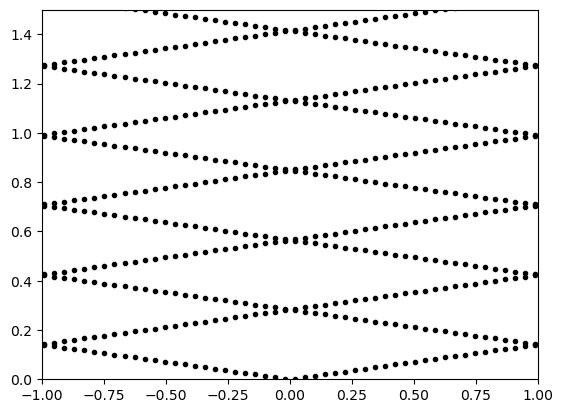

In [19]:
import matplotlib.pyplot as plt

for i in range(len(Ks)):
    plt.plot([Ks[i]] * len(dispe[i]), dispe[i],'.',color='black')
    plt.xlim([-1,1])
    plt.ylim([0,1.5])

## Campo Eléctrico

In [50]:
def Field(x):
    global a, numG, k, Vs, in1
    H = 0
    countt = 0
    for G in np.arange(-numG * 2 * np.pi / a, numG * 2 * np.pi / a + 0.0001, 2 * np.pi / a):
        countt += 1
        H += Vs[countt - 1, in1] * np.exp(1j * (k + G) * x)
    return H

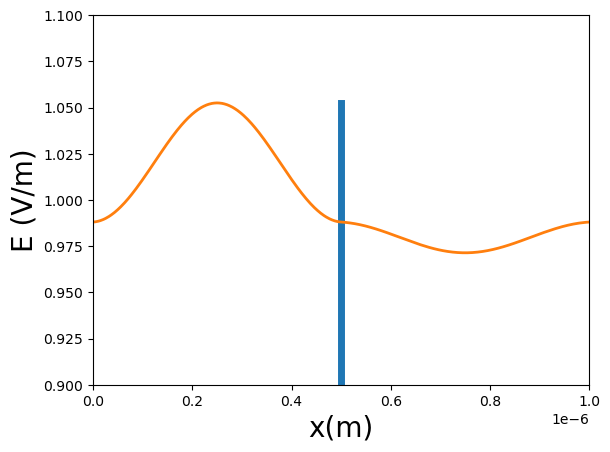

In [21]:
from scipy.linalg import eigh

def calculate_field(x, a, numG, k, Vs, in1):
    H = 0
    countt = 0
    for G in np.arange(-numG*2*np.pi/a, numG*2*np.pi/a, 2*np.pi/a):
        countt += 1
        H += Vs[countt,in1]*np.exp(1j*(k+G)*x)
    return H

k = np.pi/(15*a)
in1 = 2

countG1 = 1
countG = 1
M1 = np.zeros((2*numG+1, 2*numG+1), dtype=complex)
g = np.arange(-numG*2*np.pi/a, numG*2*np.pi/a, 2*np.pi/a)
g1 = np.arange(-numG*2*np.pi/a, numG*2*np.pi/a, 2*np.pi/a)

for i in range(len(g1)):
    for j in range(len(g)):
        M1[i,j] = chi[i,j] * (k+g1[i]) * (k+g[j])


eigvals, eigvecs = eigh(M1)
ind = np.argsort(eigvals)
Ds = eigvals[ind]
Vs = eigvecs[:,ind]

freq = np.sqrt(abs(Ds[in1-1]))*a/2/np.pi

div = 15
div1 = 1500
x = np.linspace(0, a, div1+1)
FieldE = np.abs(calculate_field(x, a, numG, k, Vs, in1))**2

alt = np.max(np.abs(FieldE))
x1 = np.linspace(0, alt, div+1)
y1 = l1*np.ones(div+1)

plt.figure(2)
plt.plot(y1, x1, linewidth=5)
plt.plot(x, FieldE, linewidth=2)
plt.xlabel('x(m)', fontsize=20)
plt.ylabel('E (V/m)', fontsize=20)
#plt.ylim([0, alt])
plt.xlim([0, a])
plt.show()
